# Labb 2

**Syftet** med den här laborationen är att använda verktygen du lärt dig i Python för att implementera en
förenklad maskininlärningsalgoritm.

- I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. 
- Du ska skapa en algoritm som baserat på den givna datan kan avgöra om en ny datapunkt ska klassificeras som **Pichu**
eller **Pikachu**.
- Följ detta flödesschema för att bygga den grundläggande algoritmen:
    1. Läs in datan och spara i lämplig datastruktur
    2. Plotta alla punkterna (varje klass får en färg) i samma fönster
    3. Läs in testpunkterna
    4. Beräkna avstånd mellan testpunkt och träningspunkter
    5. Vilken klass är punkten närmast?
        - Klassificera testpunkt som **Pichu**
        - Klassificera testpunkt som **Pikachu**

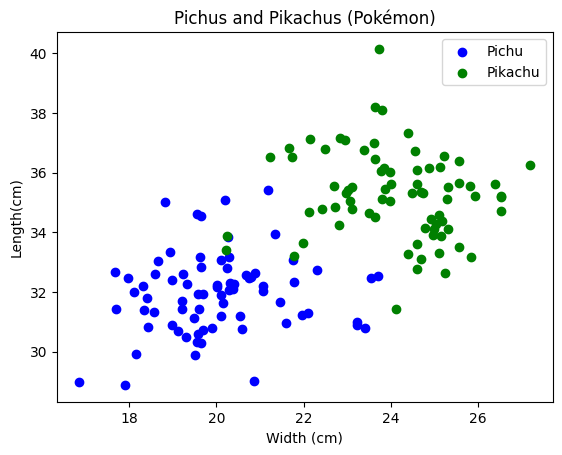

In [97]:
import matplotlib.pyplot as plt
import csv

# 3 empty lists, one for for the pokemon's width, one for its length, and one list which indicates whether the Pokémon is a Pichu or a Pikachu (0 = Pichu, 1 = Pikachu)

pokemon_width = []
pokemon_length = []
pichu_or_pikachu = []

# Read the datapoints.txt file

with open("datapoints.txt", "r") as file:
    reader = csv.DictReader(file)
    
    # NOTE:
    # In the .txt files the rows are:
    # (width (cm), height (cm), label (0-pichu, 1-pikachu)
    # There's an accidental comma separation between "0-pichu" and "1-pikachu", essentially creating an empty row. 
    # This means that the rows are:
    
    # First row = "(width (cm)"
    # Second row = " height (cm)" <--- note the space before "height (cm)"
    # Third row = " label (0-pichu" <--- note the space before "label" and that the third row ends before the accidental comma
    
    for row in reader:
        pokemon_width.append(float(row["(width (cm)"]))
        pokemon_length.append(float(row[" height (cm)"]))
        pichu_or_pikachu.append(int(row[" label (0-pichu"]))

# 4 empty lists to store width and length for Pichus and Pikachus (I separate the Pokémon lists above into lists for the individual Pokémons)

pichu_width = []
pichu_length = []
pikachu_width = []
pikachu_length = []

# Here I create two for loops to iterate through the Pichu/Pikachu lists above. 
# If it's a Pichu (0), I add the width/length to the Pichu lists. 
# If it's a Pikachu (1), I add the width/length to the Pikachu lists.

for i in range(len(pokemon_width)):
    if pichu_or_pikachu[i] == 0:
        pichu_width.append(pokemon_width[i])
    else:
        pikachu_width.append(pokemon_width[i])
        
for i in range(len(pokemon_length)):
    if pichu_or_pikachu[i] == 0:
        pichu_length.append(pokemon_length[i])
    else:
        pikachu_length.append(pokemon_length[i])

# Scatter plots for Pichus and Pikachus

plt.scatter(pichu_width, pichu_length, color = "blue", label = "Pichu")
plt.scatter(pikachu_width, pikachu_length, color = "green", label = "Pikachu")

plt.title("Pichus and Pikachus (Pokémon)")
plt.xlabel("Width (cm)")
plt.ylabel("Length(cm)")
plt.legend()

plt.show()

In [87]:
# Here I create an empty list to store the test points once I've read them from the testpoints.txt file

test_points = []

# Here I will read the testpoints.txt file

with open("testpoints.txt", "r") as file:
    # Here I skip the first line ("Test points:")
    lines = file.readlines()[1:]
    
    for line in lines:
        # Here I remove the parentheses
        line = line.replace("(", "").replace(")", "")
        
        # Here I split the string by the comma
        split_line = line.split(",")
        
        # Here I remove the numbering ("1.", "2.", "3.", and "4.")
        x_string = split_line[0].split(" ")[-1]
        y_string = split_line[1]
        
        # Here I convert the strings to floats
        x = float(x_string)
        y = float(y_string)
        
        # Here I add the tuples to the list
        test_points.append((x, y))
        
# print(test_points)

[(25.0, 32.0), (24.2, 31.5), (22.0, 34.0), (20.5, 34.0)]


In [ ]:
import math

# Function to measure distance between points
# I use the Euclidean formula we used in an earlier exercise: distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)

def distance(point1, point2):

    # Point 1
    x1 = point1[0]
    y1 = point1[1]
    
    # Point 2
    x2 = point2[0]
    y2 = point2[1]

    # Distances
    distance_x = x1 - x2
    distance_y = y1 - y2

    # Euclidean formula for distance
    distance = math.sqrt(distance_x**2 + distance_y**2)

    return distance